In [1]:
# import pandas as pd
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load census shape files
gdf_census = gpd.read_file('534group2/shapefiles/tl_2017_06_tract/')
gdf_census.shape

(8057, 13)

In [3]:
# view census shape file head
gdf_census.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,001,442700,06001442700,4427,Census Tract 4427,G5020,S,1234034,0,+37.5371514,-122.0081094,"POLYGON ((-122.01721 37.53932, -122.01719 37.5..."
1,06,001,442800,06001442800,4428,Census Tract 4428,G5020,S,1278647,0,+37.5293619,-121.9931002,"POLYGON ((-122.00230 37.52984, -122.00224 37.5..."
2,06,037,204920,06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,+34.0175004,-118.1974975,"POLYGON ((-118.20284 34.01966, -118.20283 34.0..."
3,06,037,205110,06037205110,2051.10,Census Tract 2051.10,G5020,S,286962,0,+34.0245059,-118.2142985,"POLYGON ((-118.21963 34.02629, -118.21945 34.0..."
4,06,037,205120,06037205120,2051.20,Census Tract 2051.20,G5020,S,1466129,0,+34.0187546,-118.2117956,"POLYGON ((-118.22023 34.02056, -118.22018 34.0..."


In [4]:
# load station shape file
gdf_stations = gpd.read_file('534group2/shapefiles/804_Gold_Stations_0316/')
gdf_stations.shape

(27, 14)

In [5]:
# view census shape file head
gdf_stations.head()

,LINE,LINENUM,LINENUM2,STNSEQ,STNSEQ2,DIR,STOPNUM,STATION,LAT,LONG,TPIS_NAME,POINT_X,POINT_Y,geometry
0,Gold,804,0,27,0,None,80401,Atlantic Station,34.033398,-118.154469,East LA,6.514866e+06,1.834572e+06,POINT (-118.15447 34.03340)
1,Gold,804,0,26,0,None,80402,East LA Civic Center Station,34.033364,-118.161206,ELACC,6.512824e+06,1.834563e+06,POINT (-118.16121 34.03336)
2,Gold,804,0,25,0,None,80403,Maravilla Station,34.033319,-118.168140,Mravilla,6.510724e+06,1.834550e+06,POINT (-118.16814 34.03332)
3,Gold,804,0,24,0,None,80404,Indiana Station,34.034300,-118.192182,Indiana,6.503440e+06,1.834920e+06,POINT (-118.19218 34.03430)
4,Gold,804,0,23,0,None,80405,Soto Station,34.043747,-118.210061,Soto,6.498030e+06,1.838369e+06,POINT (-118.21006 34.04375)


In [6]:
# isolate gold like stations in our study area
gdf_phase1 = ['80409', '80410', '80411', '80412', '80413', '80414', '80415', '80416', '80417', '80418', '80419', '80420', '80421']
mask1 = gdf_stations['STOPNUM'].isin(gdf_phase1)
df_stations1 = gdf_stations[mask1]
df_stations1.shape

(13, 14)

In [7]:
# load 2018 ACS data
df_2018 = pd.read_csv('534group2/ACS data/tractdata.csv', dtype={'GEOID11':str})
df_2018.shape

(2346, 17)

In [8]:
# view 2018 ACS data head
df_2018.head()

,GEOID,GEOID11,16+_emp_rate,16+_uemp_rate,uemp_rate,med_hhinc,pop,pct_white,pct_black,pct_asian,pct_other,tol_hu,med_value,pct_noins,pct_poverty,city,metro
0,1400000US06037101110,06037101110,55.7,4.7,7.7,53077,4314,76.8,1.1,7.6,14.5,150,458.7,13.2,16.1,NaN,NaN
1,1400000US06037101122,06037101122,69.1,3.3,4.6,88953,3239,87.6,1.9,6.4,4.2,100,608.4,6.8,3.4,NaN,NaN
2,1400000US06037101210,06037101210,58.8,6.6,10.1,32119,6052,78.8,2.8,4.3,14.0,100,374.3,10.6,33,NaN,NaN
3,1400000US06037101220,06037101220,54.6,4.6,7.8,41728,3497,71.3,2.0,8.6,18.0,100,414.8,10.4,15,NaN,NaN
4,1400000US06037101300,06037101300,53.8,3.2,5.7,86914,4297,86.2,3.7,6.7,3.3,150,586.0,7.4,9.2,NaN,NaN


In [9]:
# load 2010 ACS data
df_2010 = pd.read_csv('534group2/ACS data/2010_tractdata.csv', dtype={'GEOID11':str})
df_2010.shape

(2346, 15)

In [10]:
# add leading 0 to 'GEOID11'
df_2010['GEOID11']=df_2010['GEOID11'].apply(lambda x: '{0:0>11}'.format(x))

In [11]:
# view 2010 ACS data head
df_2010.head()

,GEOID,GEOID11,16+_emp_rate,16+_uemp_rate,uemp_rate,med_hhinc,pop,pct_white,pct_black,pct_asian,pct_other,tol_hu,med_hvalue,pct_noins,pct_poverty
0,1400000US06037101110,06037101110,63.5,4.4,6.5,"51,641","4,731",68.9,1.7,10.4,19.0,"1,734",430800,NaN,13.7
1,1400000US06037101122,06037101122,63.5,3.4,5.0,"80,489","3,664",76.7,0.8,13.6,8.9,"1,369",530100,NaN,6.3
2,1400000US06037101210,06037101210,61.8,5.7,8.5,"39,433","5,990",66.8,3.6,7.7,21.9,"2,317",320700,NaN,26.4
3,1400000US06037101220,06037101220,61.6,5.8,8.6,"45,687","3,363",67.0,1.3,8.2,23.5,"1,317",423900,NaN,14.0
4,1400000US06037101300,06037101300,57.9,4.7,7.5,"60,612","4,199",84.6,1.1,7.7,6.6,"1,582",536000,NaN,5.1


In [12]:
# view 2018 ACS data types
df_2018.dtypes

GEOID             object
GEOID11           object
16+_emp_rate      object
16+_uemp_rate     object
uemp_rate         object
med_hhinc         object
pop                int64
pct_white         object
pct_black         object
pct_asian         object
pct_other         object
tol_hu             int64
med_value        float64
pct_noins         object
pct_poverty       object
city              object
metro            float64
dtype: object

In [13]:
#view census shape file types
gdf_census.dtypes

STATEFP       object
COUNTYFP      object
TRACTCE       object
GEOID         object
NAME          object
NAMELSAD      object
MTFCC         object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [14]:
#view 2010 ACs data types
df_2010.dtypes

GEOID             object
GEOID11           object
16+_emp_rate     float64
16+_uemp_rate    float64
uemp_rate        float64
med_hhinc         object
pop               object
pct_white        float64
pct_black        float64
pct_asian        float64
pct_other        float64
tol_hu            object
med_hvalue        object
pct_noins        float64
pct_poverty      float64
dtype: object

In [15]:
# isolate gold line adjacent tracts for 2018 ACS data
ex_tracts = ['06037206020', '06037206031', '06037207103', '06037206010', '06037207102', '06037206020', '06037199000', '06037199000', '06037185202', '06037185310', '06037199400', '06037185100', '06037183610', '06037183620', '06037183701', '06037183810', '06037183520', '06037480600', '06037480703', '06037464000', '06037463602', '06037463700', '06037461902', '06037462302', '06037462202', '06037462201', '06037462301', '06037462700', '06037463000', '06037463102', '06037462900']
mask = df_2018['GEOID11'].isin(ex_tracts)
df_extracts_2018 = df_2018[mask]
df_extracts_2018.shape

(29, 17)

In [16]:
# isolate gold line adjacent tracts for 2010 ACS data
ex_tracts = ['06037206020', '06037206031', '06037207103', '06037206010', '06037207102', '06037206020', '06037199000', '06037199000', '06037185202', '06037185310', '06037199400', '06037185100', '06037183610', '06037183620', '06037183701', '06037183810', '06037183520', '06037480600', '06037480703', '06037464000', '06037463602', '06037463700', '06037461902', '06037462302', '06037462202', '06037462201', '06037462301', '06037462700', '06037463000', '06037463102', '06037462900']
mask2 = df_2010['GEOID11'].isin(ex_tracts)
df_extracts_2010 = df_2010[mask2]
df_extracts_2010.shape

(29, 15)

In [17]:
# isolate gold line adjacent tracts for shape file census data
gdf_tracts = ['06037206020', '06037206031', '06037207103', '06037206010', '06037207102', '06037206020', '06037199000', '06037199000', '06037185202', '06037185310', '06037199400', '06037185100', '06037183610', '06037183620', '06037183701', '06037183810', '06037183520', '06037480600', '06037480703', '06037464000', '06037463602', '06037463700', '06037461902', '06037462302', '06037462202', '06037462201', '06037462301', '06037462700', '06037463000', '06037463102', '06037462900']
mask3 = gdf_census['GEOID'].isin(gdf_tracts)
gdf_extracts = gdf_census[mask3]
gdf_extracts.shape

(29, 13)

In [18]:
# merge the 2 datasets on a shared column: tract fips code for 2018
gdf_tracts_2018 = pd.merge(left=gdf_extracts, right=df_extracts_2018, how='left', left_on='GEOID', right_on='GEOID11')
gdf_tracts_2018.shape

(29, 30)

In [19]:
# merge the 2 datasets on a shared column: tract fips code for 2010
gdf_tracts_2010 = pd.merge(left=gdf_extracts, right=df_extracts_2010, how='left', left_on='GEOID', right_on='GEOID11')
gdf_tracts_2010.shape

(29, 28)

In [20]:
# view 2010 crs
gdf_tracts_2010.crs

{'init': 'epsg:4269'}

In [21]:
#view 2018 crs
gdf_tracts_2018.crs

{'init': 'epsg:4269'}

In [22]:
gdf_tracts_2018['med_value'].head()

0    494.2
1      NaN
2    766.2
3    613.8
4    712.8
Name: med_value, dtype: float64

[]

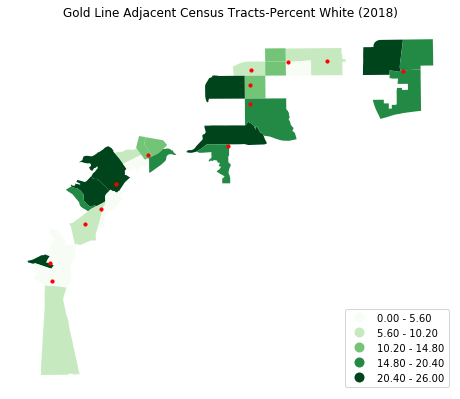

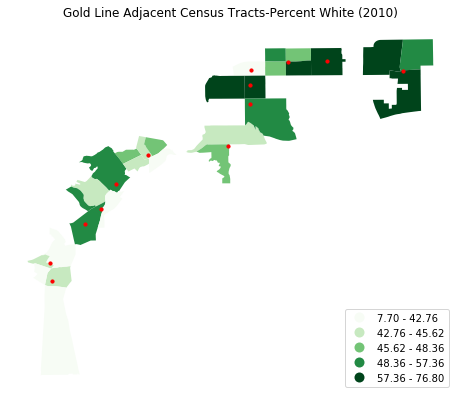

In [23]:
# plot map of percentage of white residents within gold line adjacent tracts for 2018 and 2010 with overlaid rail stops
ax = gdf_tracts_2018.plot(column='pct_white',
                        cmap='Greens', lw=0.2,
                      figsize=(8,10), legend=True, legend_kwds={'loc': 'lower right'}, scheme='Quantiles')
ax = df_stations1.plot(ax=ax, c='r', markersize=10)
ax.axis('off')
ax.set_title('Gold Line Adjacent Census Tracts-Percent White (2018)')
ax.plot()

ax1 = gdf_tracts_2010.plot(column='pct_white',
                        cmap='Greens', lw=0.2,
                        figsize=(8,10), legend=True, legend_kwds={'loc': 'lower right'}, 
                        scheme='quantiles')

ax1 = df_stations1.plot(ax=ax1, c='r', markersize=10)
ax1.axis('off')
ax1.set_title('Gold Line Adjacent Census Tracts-Percent White (2010)')
ax1.plot()

In [24]:
gdf_tracts_2010['med_hvalue'] = gdf_tracts_2010['med_hvalue'].str.replace('+','',regex=False).str.replace(',','',regex=False)
gdf_tracts_2010.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID_x', 'NAME', 'NAMELSAD',
       'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry', 'GEOID_y', 'GEOID11', '16+_emp_rate', '16+_uemp_rate',
       'uemp_rate', 'med_hhinc', 'pop', 'pct_white', 'pct_black', 'pct_asian',
       'pct_other', 'tol_hu', 'med_hvalue', 'pct_noins', 'pct_poverty'],
      dtype='object')

In [25]:
gdf_tracts_2018['med_value'] = gdf_tracts_2018['med_value'].fillna(0)
gdf_tracts_2018['med_value'].head(15)

0     494.2
1       0.0
2     766.2
3     613.8
4     712.8
5     697.0
6     482.8
7     399.2
8     765.0
9     774.7
10    922.9
11    859.6
12    987.7
13    529.9
14    703.1
Name: med_value, dtype: float64

In [26]:
#convert med_hvalue to float
gdf_tracts_2010['med_hvalue'] = gdf_tracts_2010['med_hvalue'].astype(float)

In [27]:
#convert med_value to thousands
gdf_tracts_2018['med_value'] = gdf_tracts_2018['med_value'] * 1000
# gdf_tracts_2010['med_value'] = gdf_tracts_2010['med_value'] * 1000

Text(0.5, 1, 'Gold Line Adjacent Census Tracts-Median Home Value (2010)')

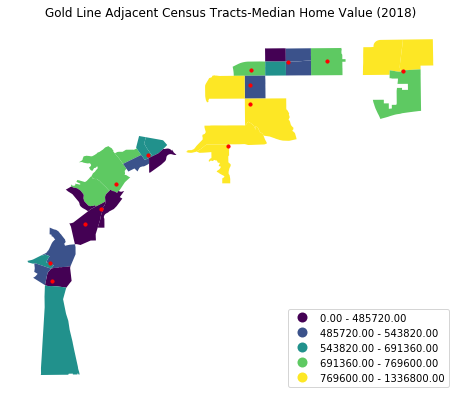

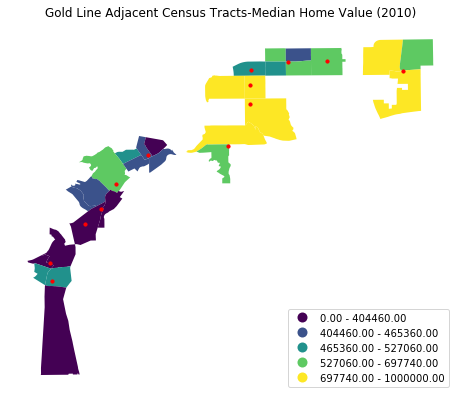

In [28]:
# plot map of median home values within gold line adjacent tracts for 2018 and 2010 with overlaid rail stops
ax = gdf_tracts_2018.plot(column='med_value',
                        cmap='viridis', lw=0.2,
                      figsize=(8,10), legend=True, legend_kwds={'loc': 'lower right'}, scheme='Quantiles')
ax = df_stations1.plot(ax=ax, c='r', markersize=10)
ax.axis('off')
ax.set_title('Gold Line Adjacent Census Tracts-Median Home Value (2018)')

ax = gdf_tracts_2010.plot(column='med_hvalue',
                        cmap='viridis', lw=0.2,
                        figsize=(8,10), legend=True, legend_kwds={'loc': 'lower right'}, 
                        scheme='quantiles')

ax = df_stations1.plot(ax=ax, c='r', markersize=10)
ax.axis('off')
ax.set_title('Gold Line Adjacent Census Tracts-Median Home Value (2010)')

Text(0.5, 1, 'Gold Line Adjacent Census Tracts-Unemployment Rate (2010)')

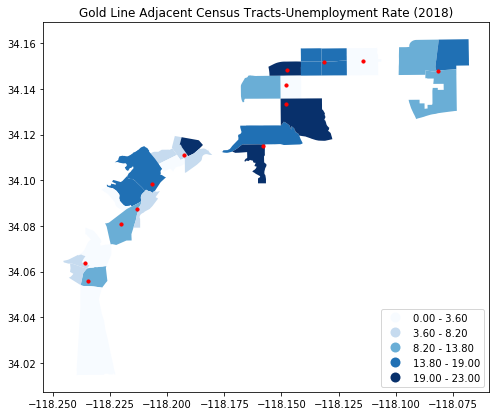

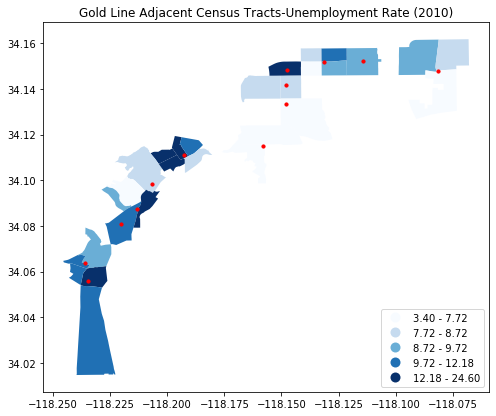

In [29]:
# plot map of unemployument rate within gold line adjacent tracts for 2018 and 2010 with overlaid rail stops
ax = gdf_tracts_2018.plot(column='uemp_rate',
                        cmap='Blues', lw=0.2,
                      figsize=(8,10), legend=True, legend_kwds={'loc': 'lower right'}, scheme='Quantiles')
ax = df_stations1.plot(ax=ax, c='r', markersize=10)
ax.set_title('Gold Line Adjacent Census Tracts-Unemployment Rate (2018)')

ax = gdf_tracts_2010.plot(column='uemp_rate',
                        cmap='Blues', lw=0.2,
                        figsize=(8,10), legend=True, legend_kwds={'loc': 'lower right'}, 
                        scheme='quantiles')

ax = df_stations1.plot(ax=ax, c='r', markersize=10)
ax.set_title('Gold Line Adjacent Census Tracts-Unemployment Rate (2010)')

In [30]:
type(gdf_tracts_2018.ix[23, 'geometry'])

<ipython-input-30-1008f9b41a49>:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  type(gdf_tracts_2018.ix[23, 'geometry'])
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]


shapely.geometry.polygon.Polygon

In [31]:
#
# gdf_stations['STATION'] = gdf_stations['STATION'].astype(float)
gdf_stations.columns

Index(['LINE', 'LINENUM', 'LINENUM2', 'STNSEQ', 'STNSEQ2', 'DIR', 'STOPNUM',
       'STATION', 'LAT', 'LONG', 'TPIS_NAME', 'POINT_X', 'POINT_Y',
       'geometry'],
      dtype='object')

In [32]:
# gdf_tracts_2018.plot()
df_stations1['POINT_X'] = df_stations1['POINT_X'].astype(float)
df_stations1['POINT_Y'] = df_stations1['POINT_Y'].astype(float)
df_stations1['STATION'] = df_stations1['STATION'].astype(str)
# for idx, row in df_stations1.iterrows():
#     plt.annotate(s=df_stations1['STATION'], 
#                  xy=(df_stations1['POINT_X'],df_stations1['POINT_Y']),
#                  horizontalalignment='center')
texts=[]

for x, y, label in zip(df_stations1['POINT_X'], df_stations1['POINT_Y'], df_stations1['STATION']):
    texts.append(plt.text(x, y, label, fontsize = 8))



<ipython-input-32-9843747e4dd8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stations1['POINT_X'] = df_stations1['POINT_X'].astype(float)
<ipython-input-32-9843747e4dd8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stations1['POINT_Y'] = df_stations1['POINT_Y'].astype(float)
<ipython-input-32-9843747e4dd8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

ValueError: Image size of -2106347868x408323937 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>